In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2

In [110]:
X = pd.read_csv('/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/x_train_all.csv', header=None)
y = pd.read_csv('/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/y_train_all.csv', header=None)

In [111]:
X.shape

(9691, 2304)

In [112]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,2294.0,2295.0,2296.0,2297.0,2298.0,2299.0,2300.0,2301.0,2302.0,2303.0
1,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
2,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
3,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
4,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0


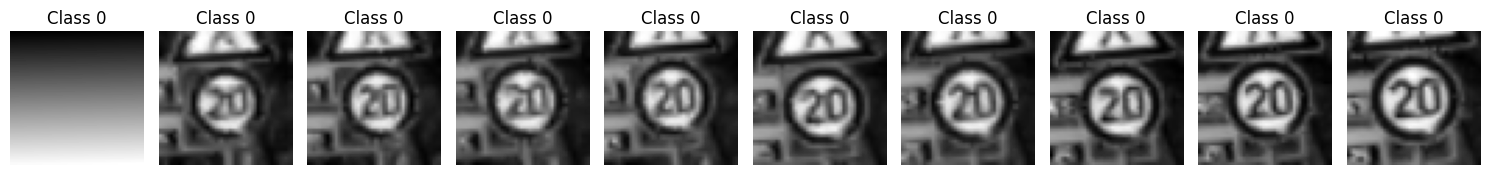

In [113]:
# Function to display sample images
def display_images(images, labels, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images.iloc[i].values.reshape(48, 48), cmap='gray')
        plt.title(f"Class {labels.iloc[i].values[0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Displaying first 10 images
display_images(X, y)

In [114]:
# Check for missing values in the features and labels
missing_features = X.isnull().sum().sum()
missing_labels = y.isnull().sum().sum()

missing_features, missing_labels

(0, 0)

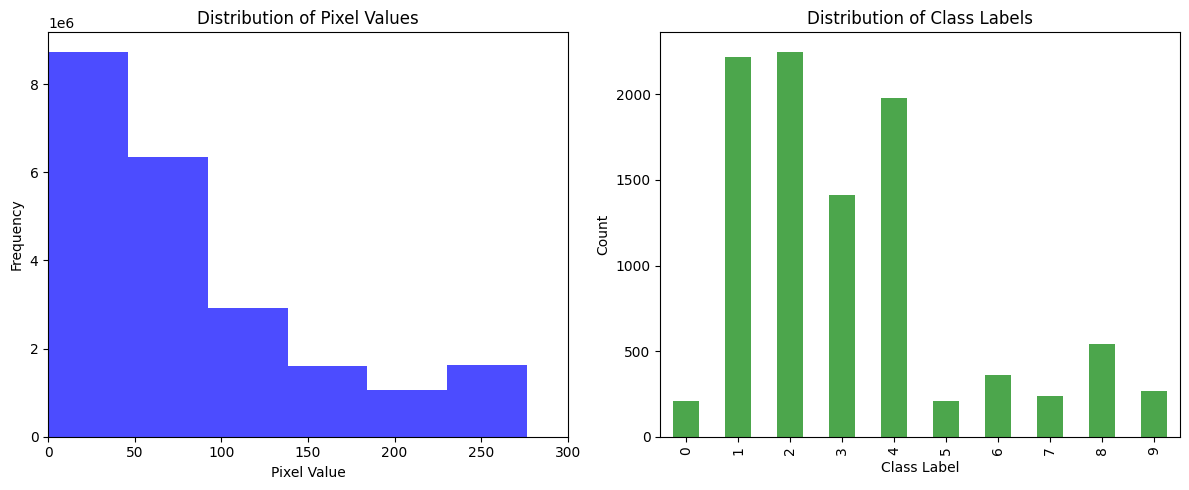

In [115]:
# Plotting the distribution of pixel values and class labels

plt.figure(figsize=(12, 5))

# Distribution of pixel values
plt.subplot(1, 2, 1)
plt.hist(X.values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Pixel Values')
plt.xlim(0, 300)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Distribution of class labels
plt.subplot(1, 2, 2)
y[0].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of Class Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [116]:
# Normalize the data to range [0, 1]
x_train_normalized = X / 255

In [117]:
x_train_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.000000,0.003922,0.007843,0.011765,0.015686,0.019608,0.023529,0.027451,0.031373,0.035294,...,8.996078,9.000000,9.003922,9.007843,9.011765,9.015686,9.019608,9.023529,9.027451,9.031373
1,0.305882,0.301961,0.298039,0.321569,0.341176,0.360784,0.407843,0.466667,0.458824,0.470588,...,0.341176,0.309804,0.282353,0.298039,0.325490,0.372549,0.388235,0.384314,0.372549,0.368627
2,0.286275,0.294118,0.309804,0.305882,0.298039,0.294118,0.349020,0.419608,0.521569,0.490196,...,0.376471,0.364706,0.333333,0.301961,0.270588,0.286275,0.325490,0.392157,0.396078,0.396078
3,0.282353,0.294118,0.309804,0.301961,0.317647,0.349020,0.411765,0.427451,0.337255,0.352941,...,0.384314,0.372549,0.345098,0.313725,0.286275,0.278431,0.290196,0.313725,0.349020,0.372549
4,0.262745,0.274510,0.290196,0.313725,0.364706,0.419608,0.431373,0.376471,0.270588,0.392157,...,0.439216,0.360784,0.341176,0.321569,0.301961,0.282353,0.274510,0.282353,0.317647,0.345098


In [118]:
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x_train_normalized, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred = gnb.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy.round(3))
print(class_report)


0.249
              precision    recall  f1-score   support

           0       0.05      0.16      0.07        43
           1       0.55      0.31      0.40       444
           2       0.43      0.19      0.27       450
           3       0.41      0.20      0.27       282
           4       0.52      0.16      0.25       396
           5       0.08      0.36      0.13        42
           6       0.09      0.72      0.16        72
           7       0.13      0.62      0.21        48
           8       0.48      0.13      0.20       108
           9       0.35      0.30      0.32        54

    accuracy                           0.25      1939
   macro avg       0.31      0.32      0.23      1939
weighted avg       0.44      0.25      0.28      1939



In [119]:
# Cross-validation with Naive Bayes
cv = StratifiedKFold(n_splits=10)
cross_val_scores = cross_val_score(GaussianNB(), x_train_normalized, y.values.ravel(), cv=cv)

cross_val_scores.mean().round(3), cross_val_scores.std().round(3)


(0.202, 0.048)

In [120]:
def top_features_for_class(X, y, label, num_features):
    # Use OneVsAll strategy: set current class to 1, all other classes to 0
    y_binary = (y == label).astype(int)
    
    # Select k best features for the current class using chi2 statistic
    k_best = SelectKBest(chi2, k=num_features)
    k_best.fit(X, y_binary)
    
    return k_best.get_support(indices=True)

# Extract top features for each class
top_features = {label: top_features_for_class(x_train_normalized, y, label, 20) for label in range(10)}

top_features


{0: array([2117, 2164, 2165, 2166, 2167, 2168, 2211, 2212, 2213, 2214, 2215,
        2216, 2217, 2259, 2260, 2261, 2262, 2263, 2264, 2265]),
 1: array([1025, 1026, 1071, 1072, 1073, 1074, 1119, 1120, 1121, 1166, 1167,
        1168, 1214, 1215, 1216, 1262, 1263, 1309, 1310, 1311]),
 2: array([ 795,  843,  981,  982, 1029, 1030, 1031, 1135, 1267, 1268, 1269,
        1311, 1312, 1314, 1315, 1316, 1317, 1363, 1364, 1365]),
 3: array([1169, 1170, 1171, 1216, 1217, 1218, 1219, 1220, 1264, 1265, 1266,
        1267, 1311, 1312, 1313, 1314, 1359, 1360, 1361, 1362]),
 4: array([ 983, 2145, 2146, 2147, 2148, 2194, 2195, 2196, 2247, 2248, 2265,
        2266, 2267, 2268, 2269, 2270, 2293, 2294, 2295, 2296]),
 5: array([1459, 1460, 1461, 1506, 1507, 1508, 1509, 1694, 1695, 1696, 1713,
        1714, 1742, 1743, 1744, 1745, 1760, 1761, 1791, 1792]),
 6: array([ 696,  697,  742,  743,  744,  745,  746,  747,  792,  793,  794,
         795,  841,  842, 1086, 1134, 1182, 1216, 1264, 1312]),
 7: array([14

In [121]:
# Creating reduced data sets
def create_dataset(features_dict, num_features):
    unique_features = np.unique(np.concatenate([features[:num_features] for features in features_dict.values()]))
    return x_train_normalized.iloc[:, unique_features]

dataset_50 = create_dataset(top_features, 5)
dataset_100 = create_dataset(top_features, 10)
dataset_200 = create_dataset(top_features, 20)

dataset_50.shape, dataset_100.shape, dataset_200.shape


((9691, 46), (9691, 88), (9691, 145))

In [122]:
# Function to evaluate GaussianNB on given dataset
def evaluate_dataset(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train.values.ravel())
    y_pred = gnb.predict(X_val)
    return classification_report(y_val, y_pred)

report_50 = evaluate_dataset(dataset_50, y)
report_100 = evaluate_dataset(dataset_100, y)
report_200 = evaluate_dataset(dataset_200, y)

print("Report fot top 50")
print(report_50)
print("Report fot top 100")
print(report_100)
print("Report fot top 200")
print(report_200)


Report fot top 50
              precision    recall  f1-score   support

           0       0.03      0.14      0.05        43
           1       0.62      0.48      0.54       444
           2       0.71      0.28      0.40       450
           3       0.29      0.41      0.34       282
           4       0.64      0.11      0.19       396
           5       0.50      0.21      0.30        42
           6       0.13      0.81      0.23        72
           7       0.31      0.52      0.39        48
           8       0.68      0.33      0.45       108
           9       0.23      0.74      0.35        54

    accuracy                           0.35      1939
   macro avg       0.41      0.40      0.32      1939
weighted avg       0.55      0.35      0.37      1939

Report fot top 100
              precision    recall  f1-score   support

           0       0.03      0.12      0.04        43
           1       0.63      0.48      0.54       444
           2       0.71      0.30      0.

### Instad of normalization, we do Standardisation

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_standard = scaler.fit_transform(X)


In [124]:
x_standard = pd.DataFrame(x_standard)

In [125]:
x_standard.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,-1.156486,-1.143467,-1.129121,-1.116937,-1.108086,-1.097942,-1.088115,-1.076435,-1.066219,-1.056493,...,32.126952,32.114243,32.149028,32.286308,32.425730,32.608075,32.744214,32.980028,33.163946,33.147089
1,-0.150277,-0.161907,-0.172400,-0.097526,-0.036208,0.027894,0.183250,0.376631,0.348283,0.382223,...,0.210212,0.100219,0.005439,0.075388,0.190789,0.378612,0.447187,0.442173,0.404060,0.391116
2,-0.214777,-0.187737,-0.133614,-0.149142,-0.178264,-0.192097,-0.011347,0.220946,0.555916,0.447030,...,0.340366,0.302474,0.193329,0.089891,-0.012954,0.056902,0.212406,0.471713,0.493122,0.494915
3,-0.227678,-0.187737,-0.133614,-0.162046,-0.113693,-0.010928,0.196223,0.246893,-0.054007,-0.006619,...,0.369289,0.331368,0.236688,0.133399,0.045258,0.027656,0.080342,0.176317,0.314999,0.405945
4,-0.292178,-0.252313,-0.198258,-0.123334,0.041277,0.222003,0.261089,0.078234,-0.274617,0.122995,...,0.571752,0.288027,0.222235,0.162405,0.103470,0.042279,0.021647,0.058159,0.196250,0.302146


In [126]:
# Splitting the data into training and validation sets
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(x_standard, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_standard, y_train_standard.values.ravel())
y_pred_standard = gnb.predict(X_test_standard)

# Calculating the metrics
accuracy = accuracy_score(y_test_standard, y_pred_standard)
class_report = classification_report(y_test, y_pred)

print(accuracy.round(3))
print(class_report)


0.249
              precision    recall  f1-score   support

           0       0.05      0.16      0.07        43
           1       0.55      0.31      0.40       444
           2       0.43      0.19      0.27       450
           3       0.41      0.20      0.27       282
           4       0.52      0.16      0.25       396
           5       0.08      0.36      0.13        42
           6       0.09      0.72      0.16        72
           7       0.13      0.62      0.21        48
           8       0.48      0.13      0.20       108
           9       0.35      0.30      0.32        54

    accuracy                           0.25      1939
   macro avg       0.31      0.32      0.23      1939
weighted avg       0.44      0.25      0.28      1939



In [127]:
from sklearn.linear_model import LassoCV

# Fit Lasso model with cross-validation to find the best alpha
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_standard, y_train_standard.values.ravel())

# Get features with non-zero coefficients
selected_features = np.where(lasso.coef_ != 0)[0]

selected_features

/Users/ilya/mainvenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0427483585981463, tolerance: 2.9243482664086438
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ilya/mainvenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9374084424998728, tolerance: 2.9243482664086438
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ilya/mainvenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.059502620501007, tolerance: 2.9243482664086438
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ilya/mainvenv/lib/python3.10/site-packages/sklearn/linear_mod

array([   0,    5,    8,    9,   19,   25,   29,   33,   34,   35,   39,
         43,   46,   49,   51,   52,   53,   65,   67,   69,   75,   82,
         83,   84,  100,  104,  109,  110,  119,  120,  129,  132,  135,
        161,  165,  168,  181,  184,  190,  192,  197,  202,  222,  223,
        226,  242,  245,  249,  253,  256,  264,  266,  268,  273,  278,
        283,  285,  286,  287,  289,  295,  314,  320,  322,  324,  332,
        334,  337,  347,  348,  355,  358,  361,  363,  368,  386,  387,
        390,  391,  400,  411,  412,  414,  424,  436,  447,  450,  455,
        457,  458,  459,  468,  471,  487,  495,  501,  504,  509,  511,
        514,  516,  517,  524,  528,  529,  538,  550,  552,  557,  565,
        574,  575,  580,  581,  585,  587,  589,  596,  598,  601,  606,
        608,  610,  619,  624,  626,  630,  637,  646,  647,  648,  650,
        654,  657,  664,  678,  679,  681,  683,  695,  698,  699,  700,
        702,  716,  718,  720,  728,  734,  739,  7

In [128]:
len(selected_features)

568

In [129]:
X_lasso = x_train_normalized[selected_features]

In [130]:
# Splitting the data into training and validation sets
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_lasso, y_train_lasso.values.ravel())
y_pred_lasso = gnb.predict(X_test_lasso)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_lasso)
class_report = classification_report(y_test, y_pred_lasso)

print(accuracy.round(3))
print(class_report)


0.275
              precision    recall  f1-score   support

           0       0.04      0.14      0.06        43
           1       0.61      0.35      0.45       444
           2       0.46      0.22      0.30       450
           3       0.39      0.24      0.29       282
           4       0.50      0.18      0.26       396
           5       0.19      0.24      0.21        42
           6       0.09      0.78      0.16        72
           7       0.12      0.54      0.19        48
           8       0.63      0.18      0.28       108
           9       0.31      0.37      0.34        54

    accuracy                           0.27      1939
   macro avg       0.33      0.32      0.25      1939
weighted avg       0.46      0.27      0.31      1939



## Random Forest

Here I decided to create a Random Forest model, for sure it's accuracy is way higher, but it's not the main point.

Main point is to use `feature_importances_` method from `RandomForestClassifier` class. This is also one more way of feature selection.

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.values.ravel())

y_pred_rf = rf_model.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)

0.978
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.95      0.99      0.97       444
           2       0.98      0.98      0.98       450
           3       0.99      0.98      0.99       282
           4       0.99      0.99      0.99       396
           5       1.00      0.93      0.96        42
           6       0.99      0.94      0.96        72
           7       1.00      0.98      0.99        48
           8       0.97      0.97      0.97       108
           9       1.00      0.98      0.99        54

    accuracy                           0.98      1939
   macro avg       0.98      0.96      0.97      1939
weighted avg       0.98      0.98      0.98      1939



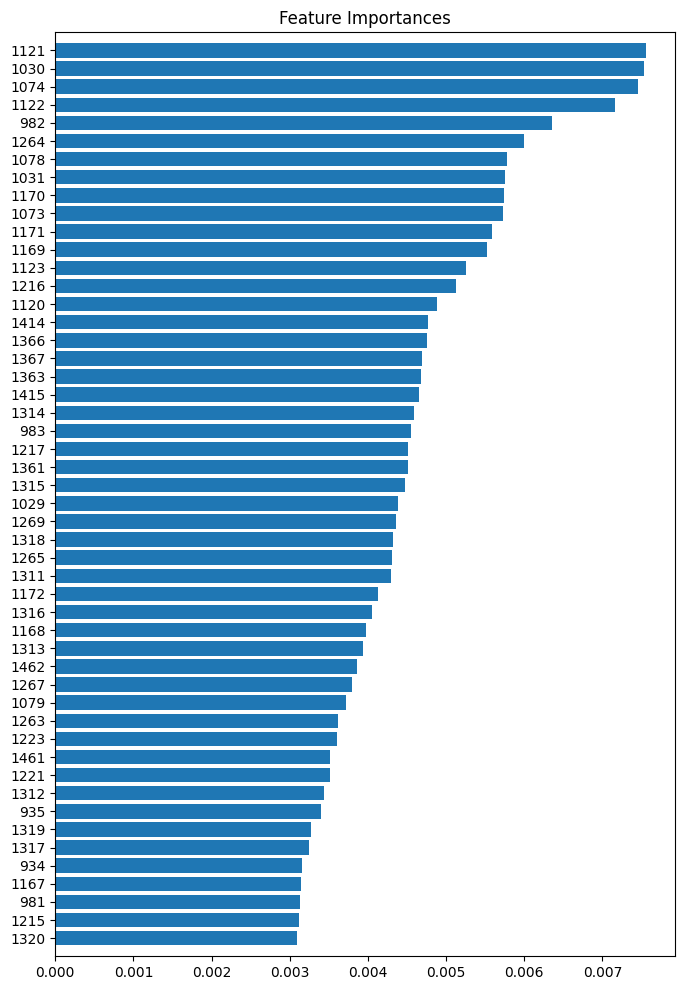

In [132]:
import matplotlib.pyplot as plt

# Extract feature importances
importances_rf = rf_model.feature_importances_

# Sort feature importances in descending order and get the indices
indices_rf = np.argsort(importances_rf)[::-1]

# Plot the top 'n' feature importances
n = 50  # for example, top 50 features
plt.figure(figsize=(8, 12))  # Adjusted the figure size for vertical orientation
plt.title("Feature Importances")
plt.barh(range(n), importances_rf[indices_rf[:n]], align="center")
plt.yticks(range(n), indices_rf[:n])
plt.ylim([-1, n])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [159]:
# I tried different number of features and "150" is the most efficient number of features
# You can play with it and also it's needed to be mentioned in the report
X_rf = x_train_normalized[indices_rf[:150]]
X_rf.head()

,1121,1030,1074,1122,982,1264,1078,1031,1170,1073,...,1135,1556,1071,1408,1370,1469,888,746,1457,1518
0,4.396078,4.039216,4.211765,4.400000,3.850980,4.956863,4.227451,4.043137,4.588235,4.207843,...,4.450980,6.101961,4.200000,5.521569,5.372549,5.760784,3.482353,2.925490,5.713725,5.952941
1,0.772549,0.607843,0.639216,0.749020,0.749020,0.917647,0.509804,0.705882,0.843137,0.682353,...,0.623529,0.772549,0.709804,0.690196,0.580392,0.705882,0.964706,0.372549,0.607843,0.831373
2,0.796078,0.517647,0.764706,0.796078,0.552941,0.760784,0.607843,0.533333,0.854902,0.752941,...,0.658824,0.678431,0.419608,0.556863,0.674510,0.690196,0.937255,0.596078,0.592157,0.807843
3,0.811765,0.529412,0.701961,0.772549,0.556863,0.890196,0.650980,0.470588,0.850980,0.749020,...,0.517647,0.768627,0.721569,0.701961,0.505882,0.717647,0.921569,0.792157,0.627451,0.843137
4,0.854902,0.498039,0.811765,0.854902,0.533333,0.882353,0.478431,0.525490,0.854902,0.800000,...,0.450980,0.733333,0.768627,0.635294,0.529412,0.823529,0.819608,0.866667,0.600000,0.823529


In [160]:
# Splitting the data into training and validation sets
X_train_rf, X_tes_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_rf, y_train_rf.values.ravel())
y_pred_rf = gnb.predict(X_tes_rf)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)


0.362
              precision    recall  f1-score   support

           0       0.01      0.07      0.02        43
           1       0.57      0.45      0.50       444
           2       0.71      0.21      0.33       450
           3       0.33      0.79      0.47       282
           4       0.50      0.01      0.01       396
           5       0.82      0.21      0.34        42
           6       0.37      0.60      0.46        72
           7       0.59      0.50      0.54        48
           8       0.74      0.52      0.61       108
           9       0.15      0.81      0.26        54

    accuracy                           0.36      1939
   macro avg       0.48      0.42      0.35      1939
weighted avg       0.54      0.36      0.34      1939



We can see that this method gives us the best accuracy, also needed to be mentioned

## Catboost - Gradient Boosting

In [135]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(iterations=100, random_seed=42)

cb_model.fit(X_train, y_train)

y_pred_cb = cb_model.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_cb)
class_report = classification_report(y_test, y_pred_cb)

print(accuracy.round(3))
print(class_report)

Learning rate set to 0.5
0:	learn: 1.6355457	total: 403ms	remaining: 39.9s
1:	learn: 1.3982543	total: 811ms	remaining: 39.7s
2:	learn: 1.2615429	total: 1.28s	remaining: 41.4s
3:	learn: 1.1235347	total: 1.7s	remaining: 40.8s
4:	learn: 1.0535007	total: 2.1s	remaining: 39.9s
5:	learn: 1.0105312	total: 2.51s	remaining: 39.3s
6:	learn: 0.9493483	total: 2.92s	remaining: 38.8s
7:	learn: 0.8846421	total: 3.32s	remaining: 38.2s
8:	learn: 0.8532674	total: 3.72s	remaining: 37.6s
9:	learn: 0.7858531	total: 4.12s	remaining: 37s
10:	learn: 0.7551665	total: 4.52s	remaining: 36.5s
11:	learn: 0.7127844	total: 4.92s	remaining: 36.1s
12:	learn: 0.6966177	total: 5.32s	remaining: 35.6s
13:	learn: 0.6709921	total: 5.72s	remaining: 35.1s
14:	learn: 0.6278381	total: 6.12s	remaining: 34.7s
15:	learn: 0.5852147	total: 6.51s	remaining: 34.2s
16:	learn: 0.5517065	total: 6.91s	remaining: 33.7s
17:	learn: 0.5304509	total: 7.31s	remaining: 33.3s
18:	learn: 0.5109464	total: 7.71s	remaining: 32.9s
19:	learn: 0.4980676

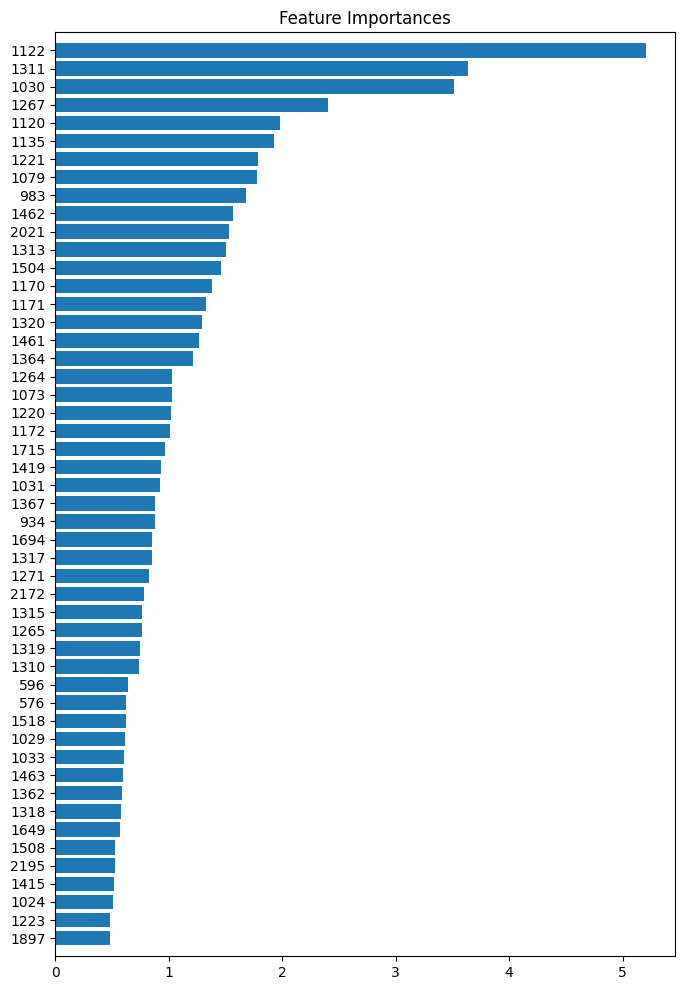

In [136]:
import matplotlib.pyplot as plt

# Extract feature importances
importances_cb = cb_model.get_feature_importance()

# Sort feature importances in descending order and get the indices
indices_cb = np.argsort(importances_cb)[::-1]

# Plot the top 'n' feature importances
n = 50  # for example, top 50 features
plt.figure(figsize=(8, 12))  # Adjusted the figure size for vertical orientation
plt.title("Feature Importances")
plt.barh(range(n), importances_cb[indices_cb[:n]], align="center")
plt.yticks(range(n), indices_cb[:n])
plt.ylim([-1, n])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [152]:
# I tried different number of features and "100" is the most efficient number of features
# You can play with it and also it's needed to be mentioned in the report
X_cb = x_train_normalized[indices_cb[:100]]
X_cb.head()

,1122,1311,1030,1267,1120,1135,1221,1079,983,1462,...,2286,1215,269,1343,842,1601,1121,1610,621,1602
0,4.400000,5.141176,4.039216,4.968627,4.392157,4.450980,4.788235,4.231373,3.854902,5.733333,...,8.964706,4.764706,1.054902,5.266667,3.301961,6.278431,4.396078,6.313725,2.435294,6.282353
1,0.749020,0.835294,0.607843,0.776471,0.811765,0.623529,0.627451,0.552941,0.803922,0.600000,...,0.549020,0.862745,0.890196,0.368627,0.800000,0.443137,0.772549,0.925490,0.274510,0.588235
2,0.796078,0.443137,0.517647,0.800000,0.717647,0.658824,0.654902,0.509804,0.639216,0.521569,...,0.388235,0.486275,0.796078,0.337255,0.921569,0.380392,0.796078,0.929412,0.278431,0.392157
3,0.772549,0.705882,0.529412,0.698039,0.827451,0.517647,0.533333,0.611765,0.647059,0.607843,...,0.384314,0.768627,0.447059,0.325490,0.866667,0.423529,0.811765,0.913725,0.266667,0.513725
4,0.854902,0.666667,0.498039,0.541176,0.890196,0.450980,0.509804,0.568627,0.560784,0.670588,...,0.360784,0.807843,0.278431,0.317647,0.772549,0.313725,0.854902,0.850980,0.258824,0.388235


In [153]:
# Splitting the data into training and validation sets
X_train_cb, X_tes_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_cb, y_train_cb.values.ravel())
y_pred_cb = gnb.predict(X_tes_cb)

# Calculating the metrics
class_report = classification_report(y_test, y_pred_cb)

print(class_report)


              precision    recall  f1-score   support

           0       0.02      0.07      0.02        43
           1       0.67      0.47      0.55       444
           2       0.75      0.33      0.45       450
           3       0.34      0.77      0.47       282
           4       0.67      0.07      0.12       396
           5       0.82      0.21      0.34        42
           6       0.27      0.58      0.37        72
           7       0.50      0.52      0.51        48
           8       0.84      0.49      0.62       108
           9       0.16      0.81      0.27        54

    accuracy                           0.40      1939
   macro avg       0.50      0.43      0.37      1939
weighted avg       0.60      0.40      0.40      1939



In [139]:
import numpy as np
import matplotlib.pyplot as plt

def plot_important_features(image, important_features, title):

    # Create a mask of the same shape as the image, initialized with zeros
    mask = np.zeros_like(image)
    
    # Set the important features in the mask to 1
    for feature in important_features:
        row = feature // image.shape[1]
        col = feature % image.shape[1]
        mask[row, col] = 1
    
    # Plot original image
    plt.imshow(image, cmap='gray')
    
    # Overlay important features colored in red
    plt.imshow(np.ma.masked_where(mask == 0, mask), cmap='autumn_r', alpha=0.6)
    
    plt.title(title)
    plt.axis('off')
    plt.show()

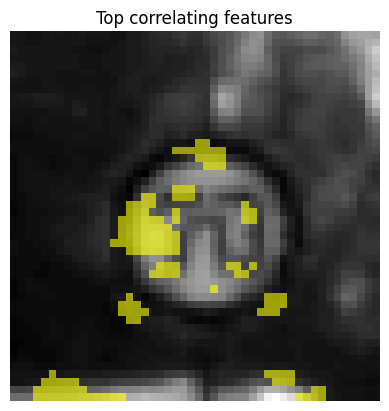

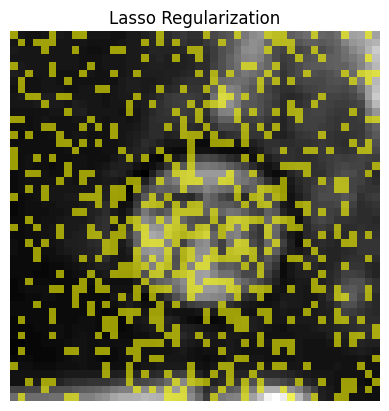

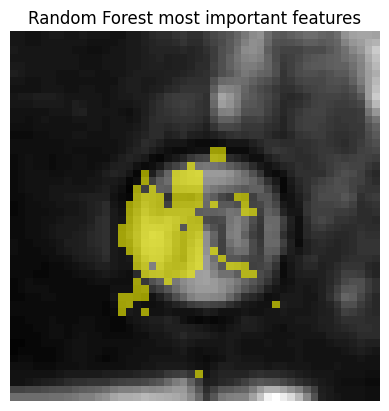

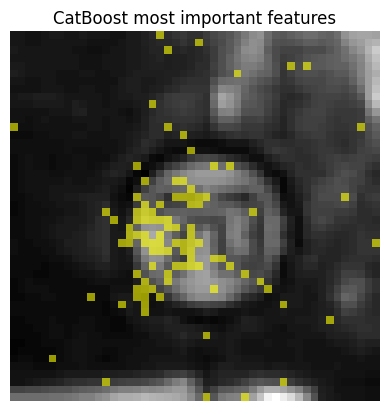

In [154]:
# Take an example image from the dataset
example_image = X_train.values[0].reshape(48, 48)

# Plot the example image with important features highlighted for each method
plot_important_features(example_image, dataset_200.columns, "Top correlating features")
plot_important_features(example_image, selected_features, "Lasso Regularization")
plot_important_features(example_image, indices_rf[:150], "Random Forest most important features")
plot_important_features(example_image, indices_cb[:100], "CatBoost most important features")


### Brief Summary

#### In total:
We tried 4 different methods of feature extraction / dimensionality reduction. The most important features from CatBoost is the best method in terms of the accuracy of the Gaussian Naive Bayes model.

As I mentioned above I chose different number of important features and as we can see we got the highet score with features from CatBoost model and also an interesting this is that the number of these features is the smalest among the others, algouht it gives the best accuacy.

And in the pictures above we can see on which pixels in the image out subsets of data are focused. Actually, I don't know what conclusion we can make from it, but there is something for sure.